In [5]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings (1).csv


In [7]:
import pandas as pd
rating_details=pd.read_csv('ratings.csv')
rating_details.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1.260759e+09
1,1,1029,3.0,1.260759e+09
2,1,1061,3.0,1.260759e+09
3,1,1129,2.0,1.260759e+09
4,1,1172,4.0,1.260759e+09


In [8]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies (1).csv


In [9]:
import pandas as pd
movies_details=pd.read_csv('movies.csv')
movies_details.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
rating_details.shape

(86148, 4)

In [12]:
movies_details.shape

(9125, 3)

In [13]:
dataset= pd.merge(rating_details,movies_details,on= 'movieId')
dataset.tail()

,userId,movieId,rating,timestamp,title,genres
86142,575,5231,4.0,1.018058e+09,Road to Morocco (1942),Comedy
86143,575,5232,4.0,1.018058e+09,Road to Singapore (1940),Comedy|Musical
86144,575,5233,4.0,1.018058e+09,Road to Utopia (1946),Comedy
86145,575,5234,4.0,1.018058e+09,Road to Zanzibar (1941),Comedy
86146,575,5301,5.0,1.018058e+09,Bite the Bullet (1975),Action|Adventure|Western


In [14]:
import datetime
from datetime import datetime, date
dataset['datetime']=pd.to_datetime(dataset['timestamp'])

In [15]:
dataset.shape

(86147, 7)

In [16]:
dataset.nunique()

userId         576
movieId       8461
rating          10
timestamp    67194
title         8460
genres         885
datetime     67194
dtype: int64

In [17]:
#Average_rating
a=dataset
a=a.groupby('title')['rating'].mean()
a

title
"Great Performances" Cats (1998)             1.750000
$9.99 (2008)                                 3.833333
'Hellboy': The Seeds of Creation (2004)      2.000000
'Neath the Arizona Skies (1934)              0.500000
'Round Midnight (1986)                       2.250000
                                               ...   
xXx (2002)                                   2.710526
xXx: State of the Union (2005)               1.000000
¡Three Amigos! (1986)                        3.104167
À nous la liberté (Freedom for Us) (1931)    4.500000
İtirazım Var (2014)                          3.500000
Name: rating, Length: 8460, dtype: float64

In [23]:
sorted_rating_wise_movies=a.sort_values(ascending=False)
sorted_rating_wise_movies


title
George Carlin: It's Bad for Ya! (2008)                                                          5.0
The Last Brickmaker in America (2001)                                                           5.0
Little Lord Fauntleroy (1936)                                                                   5.0
Disappearance of Haruhi Suzumiya, The (Suzumiya Haruhi no shôshitsu) (2010)                     5.0
Willie & Phil (1980)                                                                            5.0
                                                                                               ... 
It's All About Love (2003)                                                                      0.5
Trespass (2011)                                                                                 0.5
Bratz: The Movie (2007)                                                                         0.5
Adventures of Mary-Kate and Ashley, The: The Case of the United States Navy Adventure (1997)  

In [24]:
b=dataset.groupby('title')['rating'].count()
b.tail()

title
xXx (2002)                                   19
xXx: State of the Union (2005)                1
¡Three Amigos! (1986)                        24
À nous la liberté (Freedom for Us) (1931)     1
İtirazım Var (2014)                           1
Name: rating, dtype: int64

In [31]:
#Making a new dataframe
new_record= pd.DataFrame()
new_record['Average_rating']=a


In [32]:
new_record['Count of total ratings']=b
new_record.head()

,Average_rating,Count of total ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


In [34]:
#Importing data visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [35]:
new_record.columns

Index(['Average_rating', 'Count of total ratings'], dtype='object')

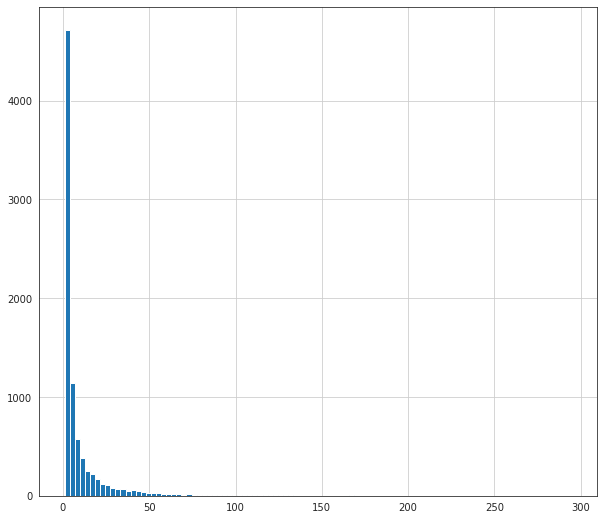

In [36]:
#Plot graph of 'num of rating column'
plt.figure(figsize=(10,9))
new_record['Count of total ratings'].hist(bins=100)

In above graph, from the output, you can see that most of the movies have received less than 50 ratings. While the number of the movies having more than 100 rating is very low.

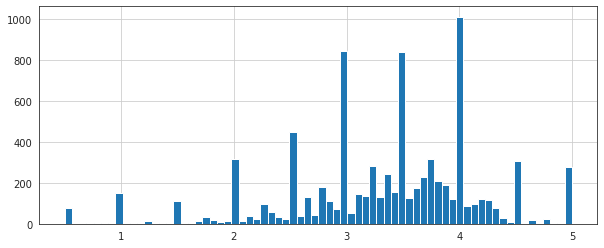

In [38]:
#Plot graph of ' rating column'
plt.figure(figsize=(10,4))
new_record['Average_rating'].hist(bins=70)

In above graph, you can see that the integer values have taller bars than the floating values since most of the users assign rating as integer value i.e 1,2,3,4 or 5. Furthermore, it is evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data.
 Earlier, we said that movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, thus usually has a higher rating.

<Figure size 576x432 with 0 Axes>

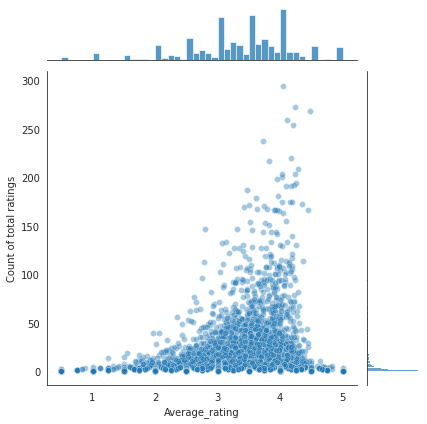

In [40]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Average_rating', y='Count of total ratings', data=new_record,alpha=0.4)

Above graph shows that , in general, movies with higher average rating actually have more number of ratings, compared with movies that have lower average ratings.

In [41]:
#Sorting values according to the 'num of rating column'
moviematrix= dataset.pivot_table(index='userId', columns='title', values='rating')
moviematrix.head()
moviematrix.columns

Index(['"Great Performances" Cats (1998)', '$9.99 (2008)',
       ''Hellboy': The Seeds of Creation (2004)',
       ''Neath the Arizona Skies (1934)', ''Round Midnight (1986)',
       ''Salem's Lot (2004)', ''Til There Was You (1997)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)',
       ...
       'Zorro, the Gay Blade (1981)', 'Zulu (1964)', '[REC] (2007)',
       'eXistenZ (1999)', 'loudQUIETloud: A Film About the Pixies (2006)',
       'xXx (2002)', 'xXx: State of the Union (2005)', '¡Three Amigos! (1986)',
       'À nous la liberté (Freedom for Us) (1931)', 'İtirazım Var (2014)'],
      dtype='object', name='title', length=8460)

In [43]:
moviematrix['xXx (2002)']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
572    3.5
573    NaN
574    3.0
575    NaN
576    NaN
Name: xXx (2002), Length: 576, dtype: float64

In [44]:
xXx_2002_rating = moviematrix['xXx (2002)']

In [45]:
xXx_2002_rating.tail()

userId
572    3.5
573    NaN
574    3.0
575    NaN
576    NaN
Name: xXx (2002), dtype: float64

Below :- 
Finding the similarity with other movies like xXx(2002)

In [46]:
movies_similar_to_xXx2002 = moviematrix.corrwith(xXx_2002_rating)
movies_similar_to_xXx2002

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
"Great Performances" Cats (1998)                  NaN
$9.99 (2008)                                      NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Neath the Arizona Skies (1934)                   NaN
'Round Midnight (1986)                            NaN
                                               ...   
xXx (2002)                                   1.000000
xXx: State of the Union (2005)                    NaN
¡Three Amigos! (1986)                       -0.409769
À nous la liberté (Freedom for Us) (1931)         NaN
İtirazım Var (2014)                               NaN
Length: 8460, dtype: float64

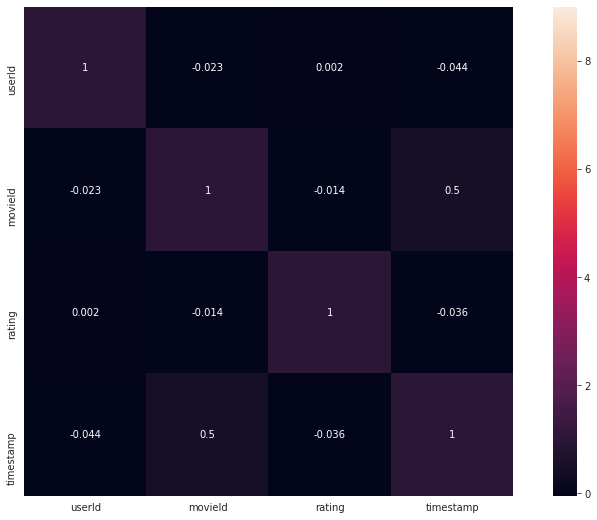

In [48]:
import matplotlib.pyplot as plt
correlation_metrics = dataset.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics, annot=True, vmax= 9, square= True)
plt.show()

In [49]:
xXx_2002_corr = pd.DataFrame(movies_similar_to_xXx2002 ,columns=['Correlation'])
xXx_2002_corr.dropna(inplace=True)
xXx_2002_corr.head()

,Correlation
title,
"'burbs, The (1989)",1.000000
(500) Days of Summer (2009),0.265684
10 Cloverfield Lane (2016),0.901127
10 Things I Hate About You (1999),-0.178869
"10,000 BC (2008)",0.970725
